In [221]:
# import the required libraries
import scipy.io as sio
from matplotlib import pyplot as plt
from scipy import misc
from math import sqrt
from numpy import ndarray
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

In [222]:
#Load the data.mat file
mat_contents = sio.loadmat('data.mat')
images = mat_contents['images']
label = mat_contents['C']
images.shape

(50, 3072)

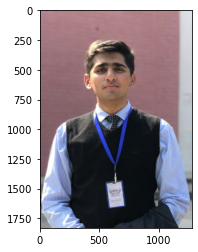

In [223]:
test_image = plt.imread("ShujaHameed.jpg")
plt.imshow(test_image)

In [224]:
import numpy as np 
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)

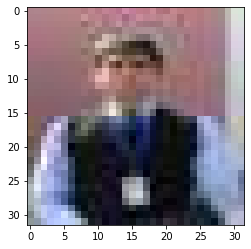

In [225]:
# Load your own image from the directory
my_image = Image.open("ShujaHameed.jpg")
resized = my_image.resize((32, 32)) # resize it to 32x32x3
resized.save('ShujaHameedNew.jpg')
my_image_resized = plt.imread("ShujaHameedNew.jpg") #open the resized image and it is used for further processing
plt.imshow(my_image_resized)
my_image_resized.shape

In [226]:
global distance 
distance_array = []
for i in range(50):
    data_image = im[:,:,:,i]
    distance = np.linalg.norm(my_image_resized - data_image)
    distance_array.insert(i,distance) 
    data_image = np.reshape(data_image,[-1], order="F")

In [227]:
old_array = []
old_array = distance_array #create a copy of array of distances
sorted_array = np.copy(distance_array) 
sorted_array.sort() #sort the distances in ascending order and store in an array
truncated_array = sorted_array[0:5] #pick up the 5 least distances, i.e the first five elements of array sorted in ascending order

In [228]:
indices = [] # create an array for indices of five least distances in the original dataset
for i in range(truncated_array.shape[0]):
    a = (np.argwhere(truncated_array[i] == old_array))
    b = a.item() #extract item from a 1-D array
    indices.insert(i,b) #insert the index into a new array
    indices.sort() # sort the indices in ascending order (optional)
    
print(indices)

[14, 31, 34, 39, 43]


In [229]:
#take user input, the value of k
print("Enter the value of 'k' for k-NN Algorithm: ")
k_val = input()
k_val = int(k_val)
print("Implementing k-NN algorithm for k = ", k_val)

#implement according to the value of k given by the user
if k_val == 1:
    val = indices[0]
elif k_val == 3:
    val = indices[0:3]#pick the three least distance indices
elif k_val == 5:
    val = indices[0:len(indices)] #pick the five least distance indices

print(val)
new = np.array([])
res = np.append(val,new)
res.shape

Enter the value of 'k' for k-NN Algorithm: 
5
Implementing k-NN algorithm for k =  5
[14, 31, 34, 39, 43]


(5,)

In [230]:
morgan_count = ahsan_count = tom_count = sanam_count = meryl_count = bilawal_count = viola_count = aishwarya_count = fawad_count = mahira_count = 0
for i in range(0,k_val):
    if res[i] in range(0,5):
        print("Morgan")
        morgan_count = morgan_count + 1
    elif res[i] in range(6,10):
        print("Ahsan Khan")
        ahsan_count = ahsan_count + 1
    elif res[i] in range(10,15):
        print("Tom Cruise")
        tom_count = tom_count + 1
    elif res[i] in range(16,20):
        print("Sanam Baloch")
        sanam_count = sanam_count + 1
    elif res[i] in range(21,25):
        print("Meryl Streep")
        meryl_count = meryl_count + 1
    elif res[i] in range(26,30):
        print("Bilawal Bhutto")
        bilawal_count = bilawal_count + 1
    elif res[i] in range(31,35):
        print("Viola Davis")
        viola_count = viola_count + 1
    elif res[i] in range(36,40):
        print("Aishwarya Rai")
        aishwarya_count = aishwarya_count + 1
    elif res[i] in range(41,45):
        print("Fawad Khan")
        fawad_count = fawad_count + 1
    elif res[i] in range(45,50):
        print("Mahira Khan")
        mahira_count = mahira_count + 1

Tom Cruise
Viola Davis
Viola Davis
Aishwarya Rai
Fawad Khan


In [231]:
count_array = np.array([morgan_count,ahsan_count,tom_count,sanam_count,meryl_count,bilawal_count,viola_count,aishwarya_count,fawad_count,mahira_count])
print(count_array)
np.sort(count_array)
max_count = np.amax(count_array)
np.resize(max_count,(1,1))
max_count_index = np.asscalar(np.argwhere(count_array == max_count)) 
print(max_count_index)

[0 0 1 0 0 0 2 1 1 0]
6


<ipython-input-231-d329ea6181bb>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  max_count_index = np.asscalar(np.argwhere(count_array == max_count))


In [232]:
character = ""
if max_count_index == 0:
    character = "Morgan"
    result = 1
elif max_count_index == 1:
    character = "Ahsan Khan"
    result_id = 6
elif max_count_index == 2:
    character = "Tom Cruise"
    result_id = 11
elif max_count_index == 3:
    character = "Sanam Baloch"
    result_id = 16
elif max_count_index == 4:
    character = "Meryl Streep"
    result_id = 21
elif max_count_index == 5:
    character = "Bilawal Bhutto"
    result_id = 26
elif max_count_index == 6:
    character = "Viola Davis"
    result_id = 31
elif max_count_index == 7:
    character = "Aishwarya Rai"
    result_id = 36
elif max_count_index == 8:
    character = "Fawad Khan"
    result_id = 41
elif max_count_index == 9:
    character = "Mahira Khan"
    result_id = 4

31


<Figure size 432x288 with 0 Axes>

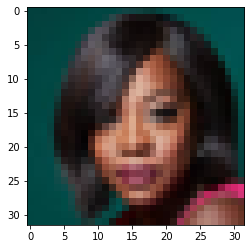

<Figure size 432x288 with 0 Axes>

In [233]:
print(result_id)
result1 = im[:,:,:,result_id] #result of 3-NN algorithm
imgplot = plt.imshow(result1)
plt.figure()

In [234]:
character

'Viola Davis'

As per 5-NN algorithm, your face resembles to  Viola Davis


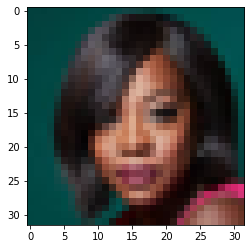

<Figure size 432x288 with 0 Axes>

In [235]:
if k_val == 1:
  print("As per 1-NN algorithm, your face resembles to ", character)
  result = im[:,:,:,result_id] #result of 1-NN algorithm
  plt.imshow(result)
  result.shape

if k_val == 3:
    print ("As per 3-NN algorithm, your face resembles to ", character) 
    result1 = im[:,:,:,result_id] #result of 3-NN algorithm
    imgplot = plt.imshow(result1)
    plt.figure()    

if k_val == 5:
  print ("As per 5-NN algorithm, your face resembles to ", character)
  result1 = im[:,:,:,result_id] #result of 5-NN algorithm
  imgplot = plt.imshow(result1)
  plt.figure()
